# 3. Image feature detection

### Goal

Here we intent to write a piece of code that allows us to detect virus particles automatically from an electron microscopy image.

As a first step we activate the *pylab inline* environment and we also import a package that makes it possible for us to read electron microscopy images in *MRC* file format.

In [1]:
%pylab inline
import utils

/Users/hantke/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


We read the image and use the function ```imshow(...)``` to display it.

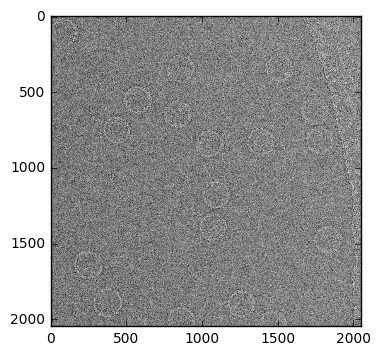

In [2]:
# Read image from MRC file
I_raw = utils.read_mrc("./data/480-bin.mrc")
figure()
imshow(I_raw, cmap='gray')

### *3. TASKS*

Complete the following function definitions together with your neighbor. Make use of the suggested functions from the _skimage_ package. The assert statements will raise errors if you made mistakes.

*** A) Crop image ***

Remove the region in the upper right that shows the sample holder by cropping the image to a size of 1600 x 1600 pixels.

Use the slicing functionality of numpy arrays: for 2D data ```any_array[start_y_axis:end_y_axis, start_x_axis:end_x_axis]```

*Help:* http://structure.usc.edu/numarray/node26.html

In [4]:
# Example
example_array = array([[1,2,3,4],
                       [5,6,7,8]])
print example_array
print example_array[0:2, 2:3]

In [387]:
def crop_image(image, N=1600):
    #########################
    # INSERT YOUR CODE HERE #
    #########################
    assert image_out.shape[0] == N
    assert image_out.shape[1] == N
    assert (image[:image_out.shape[0],:image_out.shape[1]]==image_out[:,:]).all()
    return image_out

In [6]:
# TEST
I_test = random.rand(4,4).round(1)
I_test_cropped = crop_image(I_test.copy(), N=2)
fig, (ax1, ax2) = subplots(1, 2)
ax1.imshow(I_test, interpolation='nearest', cmap='binary', vmin=0., vmax=1.)
for x in range(I_test.shape[1]):
    for y in range(I_test.shape[0]):
        ax1.text(x, y, "%.1f" % I_test[y,x], va='center', ha='center')
ax2.imshow(I_test_cropped, interpolation='nearest', cmap='binary', vmin=0., vmax=1.)
ax1.set_title("Input")
for x in range(I_test_cropped.shape[1]):
    for y in range(I_test_cropped.shape[0]):
        ax2.text(x, y, "%.2f" % I_test_cropped[y,x], va='center', ha='center')
ax2.set_title("Cropped")

*** B) Downscale image ***

Let us combine pixels by averaging neighboring pixels. This will make the image less noisy and smaller in memory.

Use the function ```skimage.transform.downscale_local_mean(...)```.

*Help:* http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.downscale_local_mean

In [390]:
def downscale_image(image, factor=4):
    import skimage.transform
    #########################
    # INSERT YOUR CODE HERE #
    #########################
    assert image.shape[0]/factor == image_out.shape[0]
    assert image.shape[1]/factor == image_out.shape[1]
    assert isclose(image[:factor,:factor].mean(), image_out[0,0])
    return image_out

In [7]:
# TEST
I_test = random.rand(4,4).round(1)
I_test_downscaled = downscale_image(I_test.copy(), factor=2)

fig, (ax1, ax2) = subplots(1, 2)
ax1.imshow(I_test, interpolation='nearest', cmap='binary', vmin=0., vmax=1.)
for x in range(I_test.shape[1]):
    for y in range(I_test.shape[0]):
        ax1.text(x, y, "%.1f" % I_test[y,x], va='center', ha='center')
ax1.set_title("Input")

ax2.imshow(I_test_cropped, interpolation='nearest', cmap='binary', vmin=0., vmax=1.)
for x in range(I_test_downscaled.shape[1]):
    for y in range(I_test_downscaled.shape[0]):
        ax2.text(x, y, "%.2f" % I_test_downscaled[y,x], va='center', ha='center')
ax2.set_title("Downscaled")

*** C) Blur image ***

Let us blur the image slightly to further reduce noise.

Use the function ```skimage.filters.gaussian(...)```.

*Help:* http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [392]:
def blur_image(image, sigma=2):
    import skimage.filters
    #########################
    # INSERT YOUR CODE HERE #
    #########################
    return image_out

In [8]:
# TEST
I_test = zeros(shape=(5, 5))
I_test[2,2] = 1
I_test_blured = blur_image(I_test.copy(), sigma=1.)
fig, (ax1, ax2) = subplots(1, 2)
ax1.imshow(I_test, interpolation='nearest', cmap='binary', vmin=0., vmax=1.)
for x in range(I_test.shape[1]):
    for y in range(I_test.shape[0]):
        ax1.text(x, y, "%.1f" % I_test[y,x], va='center', ha='center')
ax1.set_title("Input")
ax2.imshow(I_test_blured, interpolation='nearest', cmap='binary', vmin=0., vmax=1.)
for x in range(I_test_blured.shape[1]):
    for y in range(I_test_blured.shape[0]):
        ax2.text(x, y, "%.2f" % I_test_blured[y,x], va='center', ha='center')
ax2.set_title("Blured")

*** D) Threshold image ***

By thresholding we are produing a binary representation of the image.

- Use the ">"-operator to create a binary image by thresholding.

*Documentation:* https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#basic-operations

In [394]:
def threshold_image(image, threshold=0.55):
    #########################
    # INSERT YOUR CODE HERE #
    #########################
    assert image_out.max() <= 1
    assert image_out.min() >= 0
    assert image_out.shape[0] == image.shape[0]
    assert image_out.shape[1] == image.shape[1]
    return image_out

In [9]:
# TEST YOUR CODE
def generate_test_image(N=1000):
    X,Y = meshgrid(arange(N), arange(N))
    I_test = rand(N,N)*0.5+2*X/float(N)
    I_test[abs(((X-N/2)**2+(Y-N/2)**2)-(N/3)**2)<(N/10)**2] += 1.0
    I_test /= I_test.max()
    return I_test

I_test = generate_test_image()
I_test_out = threshold_image(I_test, threshold=0.4)

fig, (ax1, ax2) = subplots(1, 2)
ax1.imshow(I_test, interpolation='nearest', cmap='binary')
ax1.set_title("Input")
ax2.imshow(I_test_out, interpolation='nearest', cmap='binary', vmin=0., vmax=1.)
ax2.set_title("Thresholded")

- Use adaptive thresholding with the function ```skimage.filters.threshold_adaptive(...)``` to improve the result.

*Documentation:* http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_adaptive

In [396]:
def adaptive_threshold_image(image, block_size=201, offset=-0.05):
    import skimage.filters
    #########################
    # INSERT YOUR CODE HERE #
    #########################
    assert image_out.max() <= 1
    assert image_out.min() >= 0
    assert image_out.shape[0] == image.shape[0]
    assert image_out.shape[1] == image.shape[1]
    return image_out

In [10]:
# TEST
I_test = generate_test_image()
I_test_out = adaptive_threshold_image(I_test)

fig, (ax1, ax2) = subplots(1, 2)
ax1.imshow(I_test, interpolation='nearest', cmap='binary', vmin=0., vmax=1.)
ax1.set_title("Input")
ax2.imshow(I_test_out, interpolation='nearest', cmap='binary', vmin=0., vmax=1.)
ax2.set_title("Thresholded (adaptive)")

***C) Detect circles***

We are using the Hough transform to detect circular edges in the binary image.

Documentation: http://scikit-image.org/docs/dev/api/skimage.transform.html?highlight=hough#skimage.transform.hough_circle

Wikipedia: https://en.wikipedia.org/wiki/Hough_transform

In [385]:
# This function returns circle positions and radii from a provided binary image
def detect_circles_in_image(binary_image, n_circles=10, radius_min=10, radius_max=25,
                            blur=2., min_distance=20, num_peaks=10):
    import skimage.transform
    import skimage.filters
    import skimage.feature
    H_radii = arange(radius_min, radius_max+1, 1)
    H = skimage.transform.hough_circle(binary_image, H_radii)
    Hmax = H.max(axis=0)
    Hmax = skimage.filters.gaussian(Hmax, blur)
    positions = skimage.feature.peak_local_max(Hmax, min_distance=min_distance, num_peaks=num_peaks)
    radii = []
    for py,px in positions: 
        i = H[:,py,px].argmax()
        radii.append(H_radii[i])
    return positions, radii

## ***FINALLY: TEST YOUR CODE ON REAL EM DATA***

In [ ]:
# Crop image to 1600x1600
I_cropped = crop_image(I_raw)
# Downscaled image 4x4
I_downscaled = downscale_image(I_cropped)
# Blur image to reduce high-frequency noise for thresholding
I_blured = blur_image(I_downscaled)

# Constant threshold
I_thresholded0 = threshold_image(I_blured)
# Detect circles
positions0, radii0 = detect_circles_in_image(I_thresholded0)

# Local threshold for patches larger than a virus
I_thresholded1 = adaptive_threshold_image(I_blured)
# Detect circles
positions1, radii1 = detect_circles_in_image(I_thresholded1)

# Show results
images = [I_raw, I_downscaled, I_cropped, I_blured, I_thresholded0, I_thresholded1]
titles = ["Raw", "Downscaled", "Cropped", "Blured", "Thresholded", "Thresholded (adaptive)"]
fig, axs = subplots(len(images), 1, figsize=(10, 8*len(images)))
for ax,i,t in zip(axs, images, titles):
    ax.set_title(t)
    ax.imshow(i, cmap='gray')
    #ax.set_axis_off()
for ax, positions, radii in zip([axs[-2], axs[-1]], [positions0, positions1], [radii0, radii1]):
    for (y,x),r in zip(positions, radii): 
        circle = Circle((x,y), r, color='red', fill=False)
        ax.add_artist(circle)
        ax.text(x, y+r, "(%i,%i) %i" % (x, y, r), ha='center', va='center', color='red',
                bbox=dict(facecolor='white', alpha=0.9, lw=0))
tight_layout()